## **Load des données et animations** ##



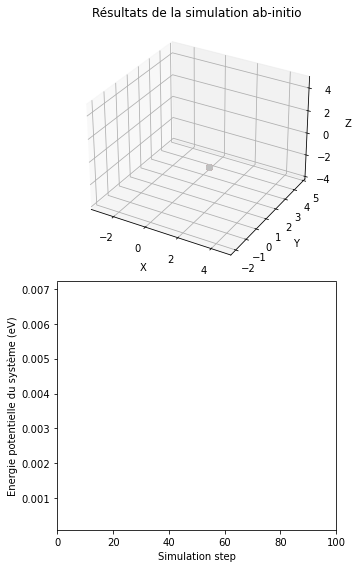

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import pandas as pd

%matplotlib inline 

#Loader du fichier .xyz
def load_data(file):
    o1_index=[2]
    o2_index=[3]
    h1_index=[4]
    h2_index=[5]
    h3_index=[6]
    h4_index=[7]
    h5_index=[8]

    o1=[]
    o2=[]
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]

    with open(file, 'r') as infile:

        for index, line in enumerate(infile):
            items = line.split()

            if index%9 in o1_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                o1.append([0,x,y,z])

            if index%9 in o2_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                o2.append([0,x,y,z])

            if index%9 in h1_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h1.append([1,x,y,z])   

            if index%9 in h2_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h2.append([1,x,y,z])

            if index%9 in h3_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h3.append([1,x,y,z])

            if index%9 in h4_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h4.append([1,x,y,z])

            if index%9 in h5_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h5.append([1,x,y,z])
                
    return np.concatenate((o1, o2, h1, h2, h3, h4, h5), axis=1).reshape(10000, 7, 4) #10000 fois 7 colomnes de 4 éléments  (particule, x, y, z)

#Loader de l'output de la simulation (fichier .out)
output=pd.read_csv('new_energies_sparse.out', sep=' ', header=None)

#output=pd.read_csv('zundel-1.ener', sep='       ')
#Extraction des énergies (5eme colonne)
energies=output[4]

#energies=output['     Pot.[a.u.]'][0::5]

#Load du fichier .xyz
#dataset=load_data("zundel-pos-1.xyz")
dataset=load_data("new_positions_sparse.xyz")

#################
# Plot des données (Animation 3D + Energie)
#################

#Nombre de data utilisées pour l'animation
N=100

#Init animation 2D
def init():
    return graph,

#Fonction update plot energies
def update_en(num):
    graph.set_data(x[:num],y[:num])
    return graph,

#Mise en forme des trajectoires
def transform_data(X, Y, Z):
    t = np.vstack((X, Y, Z))
    return t

#Fonction update pour le plot des trajectoires
def update_lines(num, dataLines, lines) :
    for line, data in zip(lines, dataLines) :
        line.set_data(data[0:2, num-1:num])
        line.set_3d_properties(data[2,num-1:num])
    return lines

#Fonction update des deux plots
def update_both(num, data2, line2):
    update_en(num)
    update_lines(num, data2, line2)
    
#Création de la figure
fig= plt.figure(figsize=(5, 8))

#ax1 = plot des énergies
ax1=fig.add_subplot(2, 1, 2) 
ax1.set_xlim(0, N)
ax1.set_ylim(np.min(energies), np.max(energies))
ax1.set_xlabel("Simulation step")
ax1.set_ylabel("Energie potentielle du système (eV)")

graph, = plt.plot([], [], '-')

#ax = plot des trajectoires
ax=fig.add_subplot(2, 1, 1, projection='3d')

ax.set_xlim3d([np.min(dataset[:, :, 1][:N]), np.max(dataset[:, :, 1][:N])])
ax.set_xlabel('X')

ax.set_ylim3d([np.min(dataset[:, :, 2][:N]), np.max(dataset[:, :, 2][:N])])
ax.set_ylabel('Y')

ax.set_zlim3d([np.min(dataset[:, :, 3][:N]), np.max(dataset[:, :, 3][:N])])
ax.set_zlabel('Z')

ax.set_title('Résultats de la simulation ab-initio')

plt.tight_layout()

# Données de l'énergie
x = range(N)
y = energies[:N]

# Données 3D
data=[]
lines=[]
colors=['r', 'r', 'silver','silver', 'silver', 'silver', 'silver'] #couleur des atomes
for i in range(dataset.shape[1]):
    coord=dataset[:, i][:N]
    X=coord[:, 1]
    Y=coord[:, 2]
    Z=coord[:, 3]
    data.append(transform_data(X, Y, Z))
    
    lines.append(ax.plot(data[0][0,0:1], data[0][1,0:1], data[0][2,0:1], 'o', color=colors[i])[0])

# Objet d'animation
ani = animation.FuncAnimation(fig, update_both, len(X), fargs=(data, lines),
                              interval=100, blit=False)

# ani.save('ab-initio.mp4')
plt.show()

In [181]:
import mdtraj as mdt
import nglview as nv
nv.show_mdtraj(mdt.load_xyz("new_positions_sparse.xyz", top='zundel.pdb'))

NGLWidget(max_frame=9999)

In [182]:
output

,0,1,2,3,4,5,6,7,8
0,1.0,2.0,0.003692,0.003269,0.000096,0.003174,0.000302,95.439881,NaN
1,1.0,102.0,0.004527,0.006531,0.002632,0.003899,0.000371,117.256850,NaN
2,1.0,202.0,0.003945,0.007161,0.002978,0.004182,0.000398,125.779360,NaN
3,1.0,302.0,0.003904,0.005873,0.002675,0.003198,0.000305,96.178014,NaN
4,1.0,402.0,0.004485,0.007464,0.003446,0.004018,0.000383,120.833550,NaN
...,...,...,...,...,...,...,...,...,...
9995,1.0,999502.0,0.013434,0.006745,0.002987,0.003757,0.000358,112.999770,NaN
9996,1.0,999602.0,0.012982,0.004565,0.001085,0.003480,0.000331,104.660550,NaN
9997,1.0,999702.0,0.013049,0.006868,0.003645,0.003222,0.000307,96.906016,NaN
9998,1.0,999802.0,0.013642,0.006621,0.002572,0.004050,0.000386,121.790850,NaN


## **Mise en place des descripteurs (matrice de Coulomb)** ##

In [183]:
from ase import Atoms
from dscribe.descriptors import CoulombMatrix

#Fonction pour la création de la matrice de Coulomb à partir d'un dataset
def create_CM(data):
    cm = CoulombMatrix(n_atoms_max=7)
    zundel_steps=[]
    for i in range(data.shape[0]):
        zundel_steps.append(cm.create(Atoms("O2H5", [(data[i][j][1], data[i][j][2], data[i][j][3]) for j in range(data.shape[1])])))
    return np.array(zundel_steps)

## **Séparation et exploration statistique des données**. ##

data shape : (10000, 7, 4)
target shape : (10000,)


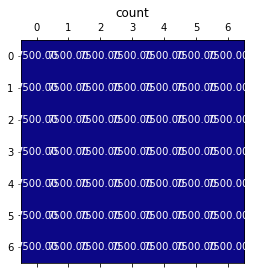

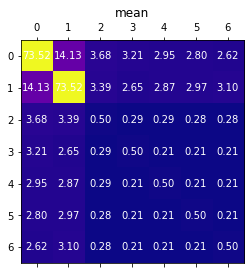

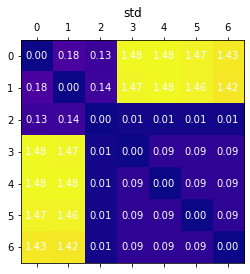

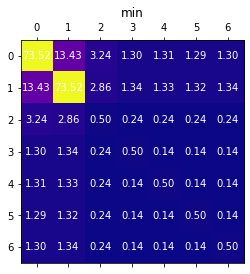

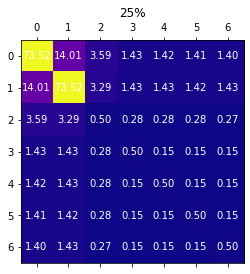

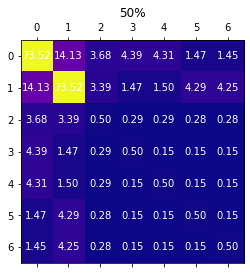

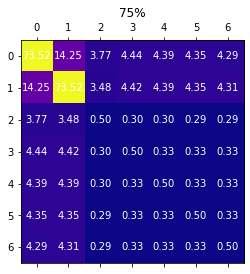

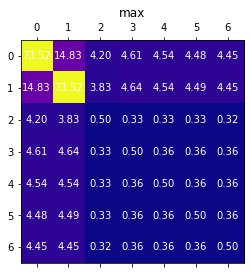

In [184]:
#Séparation des données
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

print("data shape :", dataset.shape)
print("target shape :", energies.shape)
X_train, X_test, y_train, y_test=train_test_split(dataset, energies, random_state=22)

#création des matrices de Coulomb pour les données d'entrainement
X_train_CM=create_CM(X_train)
X_test_CM=create_CM(X_test)

#conversion dans un Dataset pour explorer les données statistiquement avec les outils pandas
X_train_DF=pd.DataFrame(X_train_CM)

stat=X_train_DF.describe()

statnp=stat.to_numpy().reshape(8, 7, 7)

for i, l in enumerate(stat.index):
    #plt.subplot(2, 4, i+1)
    plt.matshow(statnp[i], cmap="plasma")
    for (x, y), value in np.ndenumerate(statnp[i]):
        plt.text(x, y, f"{value:.2f}", va="center", ha="center", color="white")
    plt.title(l)


Text(0.5, 1.0, 'Exemple de matrice de Coulomb')

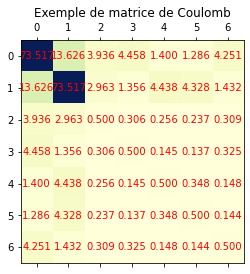

In [185]:
plt.matshow(create_CM(X_train)[0].reshape(7, 7), cmap="YlGnBu")

for (x, y), value in np.ndenumerate(create_CM(X_train)[0].reshape(7, 7)):
    plt.text(x, y, f"{value:.3f}", va="center", ha="center", color="red")
    
plt.title("Exemple de matrice de Coulomb")

Réduction des données


In [186]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_CM_red=scaler.fit_transform(X_train_CM)
X_test_CM_red=scaler.fit_transform(X_test_CM)

#scaling des y
y_train=scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test=scaler.fit_transform(y_test.to_numpy().reshape(-1, 1))

### Eigenspectrum ###

In [187]:
def create_CM_eigen(data):
    cm = CoulombMatrix(n_atoms_max=7, permutation='eigenspectrum')
    zundel_steps=[]
    for i in range(data.shape[0]):
        zundel_steps.append(cm.create(Atoms("O2H5", [(data[i][j][1], data[i][j][2], data[i][j][3]) for j in range(data.shape[1])])))
    return np.array(zundel_steps)

In [188]:
pd.DataFrame(create_CM_eigen(X_train)).describe()

,0,1,2,3,4,5,6
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,88.701505,59.682468,0.417565,0.242826,0.173534,0.162842,0.152649
std,0.183102,0.177838,0.009194,0.006553,0.004729,0.004301,0.005124
min,87.977655,58.979104,0.388062,0.219960,0.157364,0.143278,0.131788
25%,88.582326,59.559842,0.411327,0.238478,0.170198,0.159958,0.149336
50%,88.705274,59.678830,0.417490,0.242890,0.173346,0.162958,0.152911
75%,88.827863,59.797708,0.423616,0.247244,0.176679,0.165817,0.156172
max,89.435804,60.383806,0.453386,0.267795,0.194823,0.178765,0.169214


In [189]:
X_train_CMe=create_CM_eigen(X_train)
X_test_CMe=create_CM_eigen(X_test)
X_train_CMe_red=scaler.fit_transform(X_train_CMe)
X_test_CMe_red=scaler.fit_transform(X_test_CMe)

## SOAP ##

In [190]:
from dscribe.descriptors import SOAP
from ase.io import read
from sklearn.decomposition import PCA
from dscribe.kernels import AverageKernel

def SOAP_Vectors(xyz_filename, output_filename=None, cutoff=3., n_max=6, l_max=6, zeta=2.0,
         atom_sigma=0.5, pca_d=25,kernel_matrix=False):
    # read the xyz file
    frames = read(xyz_filename, ':')
    n_frames = len(frames)

    # species and PBC
    global_species = []
    for frame in frames:
        global_species.extend(frame.get_atomic_numbers())
        frame.set_pbc(True)
    global_species = np.unique(global_species)
    print("loaded xyz file: {fn}, with {n_frames} frames and elements: {ele}".format(fn=xyz_filename, n_frames=n_frames,
                                                                                     ele=global_species))

    # soap
    desc = SOAP(rcut=cutoff, nmax=n_max, lmax=l_max, sigma=atom_sigma, species=global_species, periodic=False,
                average="off")

    # kernel
    soap_vectors = desc.create(frames)
    if kernel_matrix :
        print('NOT IMPLEMENTED YET')
#         rel = AverageKernel(metric="linear")
#         kNN = np.array([((features_2d@features_2d.T))** zeta for features_2d in soap_vectors])
#         print("kernel matrix (shape: {}) calculated from vector set of shape {}".format(kNN.shape, soap_vectors.shape))

#         # projection
#         data_2d = np.array([features_2d.flatten() for features_2d in kNN])
#         pca = PCA(n_components=pca_d)
#         pca.fit(data_2d)
#         knn_pca = pca.transform(data_2d)
#         print("original shape:   ", kNN.shape) 
#         print("transformed shape:", knn_pca.shape)
#         return knn_pca,pca
    else :  
        data_2d = np.array([features_2d.flatten() for features_2d in soap_vectors])
        pca = PCA(n_components=pca_d)
        pca.fit(data_2d)
        Soap_pca = pca.transform(data_2d)
        print("original shape:   ", soap_vectors.shape) 
        print("transformed shape:", Soap_pca.shape)
        return Soap_pca,pca



In [191]:
Soap_pca,pca=SOAP_Vectors("new_positions_sparse.xyz", output_filename=None, cutoff=3., n_max=6, l_max=6, zeta=2.0,
         atom_sigma=0.5, pca_d=12)

loaded xyz file: new_positions_sparse.xyz, with 10000 frames and elements: [1 8]
original shape:    (10000, 7, 546)
transformed shape: (10000, 12)


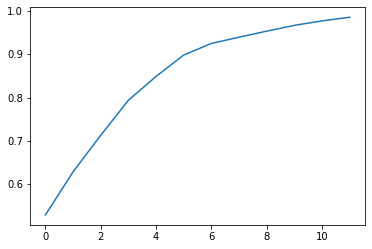

In [192]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

X_train_soap, X_test_soap, y_train, y_test=train_test_split(Soap_pca, energies, random_state=22)

X_train_soap_red=scaler.fit_transform(X_train_soap)
X_test_soap_red=scaler.fit_transform(X_test_soap)

y_train=scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test=scaler.fit_transform(y_test.to_numpy().reshape(-1, 1))


## PIV Vector ##

In [193]:
def C(rmin, rmax, x): 
    a=20/(rmax-rmin)

    norm=a*x+10-a*rmax
    y=1/(np.exp(0.3*norm)+1)
    return y

def PIV_descr(X, pca_d=10):
    piv=[]
    for i in range(len(X)):
        dist=distance.cdist(dataset[i][:, 1:], dataset[i][:, 1:], 'euclidean')
        a=np.array([dist[0, 1]])
        b=np.concatenate((dist[0, 2:],dist[1, 2:]))
        c=[]
        for i in range(2, dist.shape[0]):
            c=np.concatenate((c, dist[i, i+1:]))

        
        brmin=np.min(b)
        brmax=np.max(b)
        
        crmin=np.min(c)
        crmax=np.max(c)
        
        aswitched=C(brmin, brmax, a)
        bswitched=C(brmin, brmax, b)
        cswitched=C(crmin, crmax, c)
        
        bs=np.sort(bswitched)
        cs=np.sort(cswitched)
        
        piv.append(np.concatenate((aswitched, bs, cs)))
        
    data_2d = np.array([features_2d.flatten() for features_2d in piv])
    pca = PCA(n_components=pca_d)
    pca.fit(data_2d)
    piv_pca = pca.transform(data_2d)
    print("original shape:   ", piv_pca.shape) 
    print("transformed shape:", piv_pca.shape)
    
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    return piv_pca

original shape:    (7500, 10)
transformed shape: (7500, 10)
original shape:    (2500, 10)
transformed shape: (2500, 10)


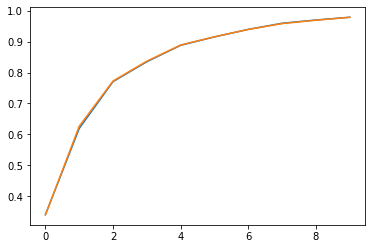

In [194]:
X_train_PIV=PIV_descr(X_train)
X_train_PIV_red=scaler.fit_transform(X_train_PIV)
X_test_PIV=PIV_descr(X_test)
X_test_PIV_red=scaler.fit_transform(X_test_PIV)

## **Prédicteur naif** ##

In [195]:
from sklearn.metrics import mean_squared_error

def naive_predictor(xtrain, ytrain):
    return np.ones((xtrain.shape[0],))*ytrain.mean()

y_fit=naive_predictor(X_train, y_train)
y_pred_test=naive_predictor(X_test,y_train)


mse=mean_squared_error(np.array(y_train), y_fit)
mse_test=mean_squared_error(np.array(y_test), y_pred_test)
print(mse)
print(mse_test)

1.0
1.0


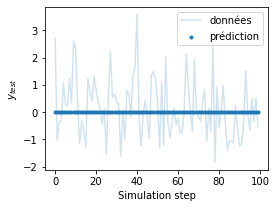

In [25]:
fig=plt.figure(figsize=(4,3))
plt.scatter(np.arange(0, len(y_train[:100])),y_fit[:100], marker='.', label="prédiction")
plt.plot(np.arange(0, len(y_train[:100])), y_train[:100], alpha=0.2, label='données')
plt.xlabel('Simulation step')
plt.ylabel('$y_{test}$')
plt.legend()

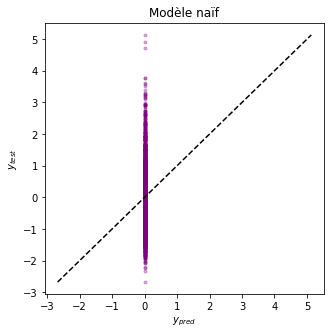

In [72]:
fig=plt.figure(figsize=(5,5))
plt.scatter(y_pred_test,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
xmin, xmax=plt.xlim()
ymin, ymax=plt.ylim()
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Modèle naïf")

plt.show()

In [27]:
y_fit=naive_predictor(X_train_PIV_red, y_train)
y_pred_test=naive_predictor(X_test_PIV_red, y_train)


mse=mean_squared_error(np.array(y_train), y_fit)
mse_test=mean_squared_error(np.array(y_test), y_pred_test)
print(mse)
print(mse_test)

1.0
1.0


## **Modèle linéaire** ##

In [28]:
from sklearn.linear_model import RidgeCV

a=np.logspace(-10, 10, 1000)
model=RidgeCV(alphas=a)
model.fit(X_train_CMe_red, y_train)

print("Best regularization parameter :", model.alpha_)
print("RMSE moyen:", -model.best_score_)

y_pred_test_rcv=model.predict(X_test_CMe_red)
mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
print(mse_test_rcv)

Best regularization parameter : 17.030650292528428
RMSE moyen: 0.7911226116852111
0.7564859632709957


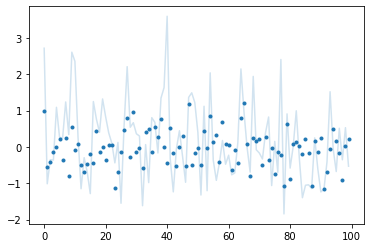

In [29]:
plt.scatter(np.arange(0, len(y_train[:100])),model.predict(X_train_CMe_red[:100]), marker='.')
plt.plot(np.arange(0, len(y_train[:100])), y_train[:100], alpha=0.2)

In [30]:
#PIV
from sklearn.linear_model import RidgeCV

a=np.logspace(-10, 10, 1000)
model=RidgeCV(alphas=a)
model.fit(X_train_PIV_red, y_train)

print("Best regularization parameter :", model.alpha_)
print("RMSE moyen:", -model.best_score_)

y_pred_test_rcv=model.predict(X_test_PIV_red)
mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
print(mse_test_rcv)

Best regularization parameter : 4939.621743878326
RMSE moyen: 0.9993612844352441
1.0020556320981489


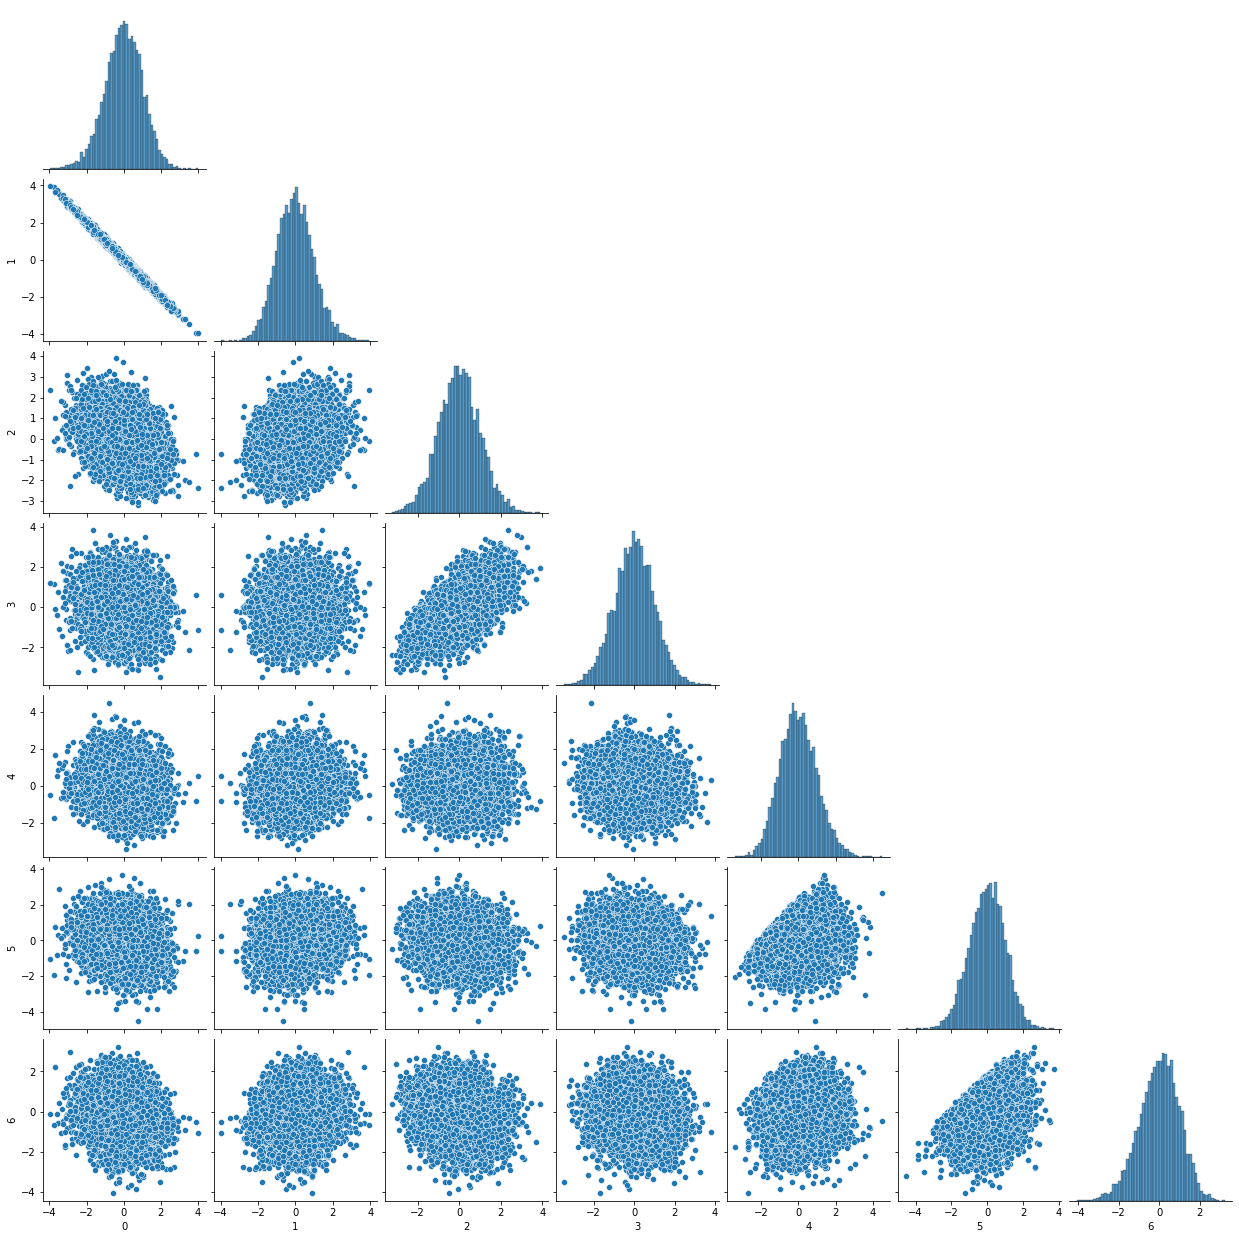

In [31]:
import seaborn as sns

sns.pairplot(pd.DataFrame(X_train_CMe_red), corner=True)

In [32]:
from sklearn.preprocessing import PolynomialFeatures

mse_list=[]
mse_test_list=[]
for d in range(1,5):
    poly=PolynomialFeatures(degree=d)
    Zmodif=poly.fit_transform(X_train_CMe_red)
    Zmodif_test=poly.fit_transform(X_test_CMe_red)

    a=np.logspace(-10, 10, 1000)
    model=RidgeCV(alphas=a)
    model.fit(Zmodif, y_train)

    print("Best regularization parameter :", model.alpha_)
    print("RMSE moyen:", -model.best_score_)

    y_pred_test_rcv=model.predict(Zmodif_test)
    mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
    print(mse_test_rcv)
    mse_list.append(-model.best_score_)
    mse_test_list.append(mse_test_rcv)

Best regularization parameter : 17.030650292528428
RMSE moyen: 0.7911226116852113
0.7564859632710083
Best regularization parameter : 14.162866162991973
RMSE moyen: 0.5399559357654161
0.5213666113616616
Best regularization parameter : 17.030650292528428
RMSE moyen: 0.5402247037401428
0.5217424378170666
Best regularization parameter : 42.818517986524064
RMSE moyen: 0.5518063896545434
0.5342317688277887


Text(0.5, 0, 'Dimension du polynome')

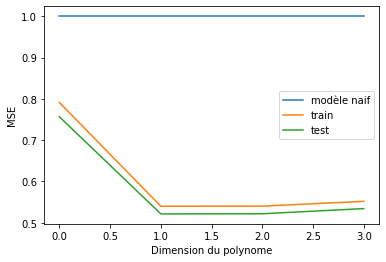

In [33]:
plt.plot([1]*len(mse_list), label='modèle naif')
plt.plot(mse_list, label="train")
plt.plot(mse_test_list, label='test')
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Dimension du polynome")

In [34]:
y_pred=model.predict(Zmodif_test)

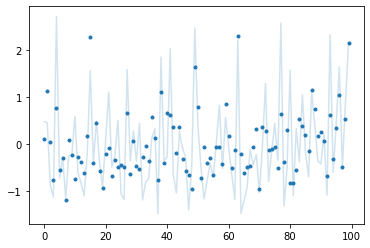

In [35]:
plt.scatter(np.arange(0, len(y_test[:100])),y_pred[:100], marker='.')
plt.plot(np.arange(0, len(y_test[:100])), y_test[:100], alpha=0.2)

In [36]:
from sklearn.linear_model import ElasticNetCV

a=np.logspace(-10, 10)
model=ElasticNetCV(alphas=a, max_iter=1000000)
model.fit(X_train_CMe_red, y_train)

print("Best regularization parameter :", model.alpha_)
#print("RMSE moyen:", -model.best_score_)

y_pred_train_en=model.predict(X_train_CMe_red)
mse_train_en=mean_squared_error(np.array(y_train), y_pred_train_en)
print(mse_train_en)


y_pred_test_en=model.predict(X_test_CMe_red)
mse_test_en=mean_squared_error(np.array(y_test), y_pred_test_en)
print(mse_test_en)

Best regularization parameter : 0.000339322177189533
0.7893650565523528
0.7564322245105621


C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Kernel Ridge Regression - Recherche sur grille ##

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

In [45]:
#plt.semilogx(A, mse_test_krr, marker='o', linestyle='--', color='black')
#plt.xlabel("log(Regul. paramater)")
#plt.ylabel("MSE")
#plt.grid(True, which="both", ls="-")
#plt.show()
#print("Best score KRR :", np.min(mse_test_krr))
#idx=np.where(np.array(mse_test_krr)==np.min(mse_test_krr))
#print("Best param KRR :", A[idx])

### SOAP ###

In [84]:
krrsoap = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,param_grid={"alpha": np.logspace(-11.5, -10.5,4),
                                                                          "gamma": np.logspace(-7,-5,6)})
krrsoap.fit(X_train_soap_red, y_train)

y_pred_test_krr_soap=krrsoap.predict(X_test_soap_red)

mse_test_soap=mean_squared_error(np.array(y_test), y_pred_test_krr_soap)
b_params_soap=krrsoap.best_params_
print(mse_test_soap)
print(b_params_soap)

C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.24162e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.09026e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.10611e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.7371e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.13639e-1

C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.79667e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.9313e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.25587e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.24118e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.18548e-1

0.23914669496495972
{'alpha': 1.4677992676220676e-11, 'gamma': 1e-05}


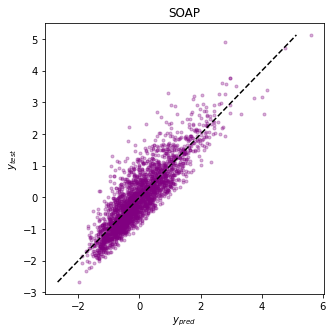

(2500, 12)


In [91]:
fig=plt.figure(figsize=(5,5))
y_pred_test_krr_soap=krrsoap.predict(X_test_soap_red)
plt.scatter(y_pred_test_krr_soap,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("SOAP")
plt.show()

print(X_test_soap_red.shape)

### Coulomb Matrix ###

In [67]:
krrcm = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,param_grid={"alpha": np.logspace(-11, -10,4),
                                                                          "gamma": np.logspace(-5, -3,4)})
krrcm.fit(X_train_CM_red, y_train)

y_pred_test_krr_cm=krrcm.predict(X_test_CM_red)

mse_test_cm=mean_squared_error(np.array(y_test), y_pred_test_krr_cm)
b_params_cm=krrcm.best_params_
print(mse_test_cm)
print(b_params_cm)

C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.08106e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.09593e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.09094e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.06055e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=9.88952e-

0.9167550999982191
{'alpha': 4.641588833612773e-11, 'gamma': 0.001}


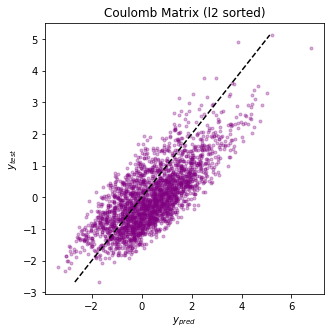

(7500, 49)


In [92]:
fig=plt.figure(figsize=(5,5))
y_pred_test_krr_cm=krrcm.predict(X_test_CM_red)
plt.scatter(y_pred_test_krr_cm,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.title("Coulomb Matrix (l2 sorted)")
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.show()
print(X_train_CM_red.shape)

### Coulomb Matrix Eigenvalues ###

In [50]:
krrcmeig = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,param_grid={"alpha": np.logspace(-10, -9,4),
                                                                          "gamma": np.logspace(-5, -4,4)})
krrcmeig.fit(X_train_CMe_red, y_train)

y_pred_test_krr_cmeig=krrcmeig.predict(X_test_CMe_red)

mse_test_cmeig=mean_squared_error(np.array(y_test), y_pred_test_krr_cmeig)
b_params_cmeig=krrcmeig.best_params_
print(mse_test_cmeig)
print(b_params_cmeig)

0.5208115911258475
{'alpha': 2.1544346900318867e-10, 'gamma': 1e-05}


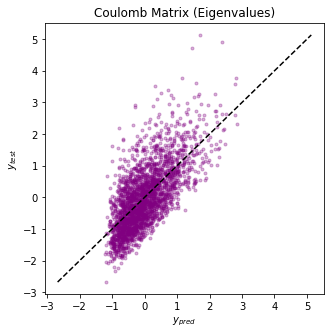

(7500, 7)


In [93]:
fig=plt.figure(figsize=(5,5))
y_pred_test_krr_cmeig=krrcmeig.predict(X_test_CMe_red)
plt.scatter(y_pred_test_krr_cmeig,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Coulomb Matrix (Eigenvalues)")
plt.show()
print(X_train_CMe_red.shape)

### PIV ###

In [119]:
krrPIV = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,param_grid={"alpha": np.logspace(5, 10,4),
                                                                          "gamma": np.logspace(-5, -2,1)})
krrPIV.fit(X_train_PIV_red, y_train)

y_pred_test_krr_PIV=krrPIV.predict(X_test_PIV_red)

mse_test_PIV=mean_squared_error(np.array(y_test), y_pred_test_krr_PIV)
b_params_PIV=krrPIV.best_params_
print(mse_test_PIV)
print(b_params_PIV)

0.9999999999999858
{'alpha': 10000000000.0, 'gamma': 1e-05}


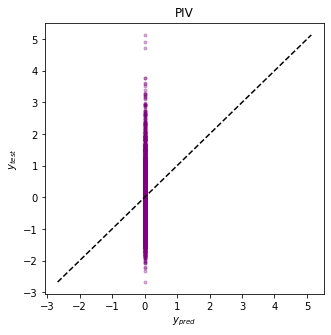

(7500, 10)


In [120]:
fig=plt.figure(figsize=(5,5))
y_pred_test_krr_PIV=krrPIV.predict(X_test_PIV)
plt.scatter(y_pred_test_krr_PIV,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("PIV")
plt.show()
print(X_train_PIV_red.shape)

## **Réseau de neurones** ##

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 15)                195       
                                                                 
 dense_73 (Dense)            (None, 12)                192       
                                                                 
 dense_74 (Dense)            (None, 1)                 13        
                                                                 
Total params: 400
Trainable params: 400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
94/94 [==============================] - 1s 3ms/step - loss: 1.1314 - mean_squared_error: 1.1314 - val_loss: 0.8886 - val_mean_squared_error: 0.8886
Epoch 2/300
94/94 [==============================] - 0s 2ms/step - loss: 0.9207 - mean_squared_error: 0.9207 - val_loss: 0.8431 - val_mean_squared_error: 0.84

94/94 [==============================] - 0s 2ms/step - loss: 0.3561 - mean_squared_error: 0.3561 - val_loss: 0.3852 - val_mean_squared_error: 0.3852
Epoch 47/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3500 - mean_squared_error: 0.3500 - val_loss: 0.3769 - val_mean_squared_error: 0.3769
Epoch 48/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3476 - mean_squared_error: 0.3476 - val_loss: 0.3722 - val_mean_squared_error: 0.3722
Epoch 49/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3444 - mean_squared_error: 0.3444 - val_loss: 0.3742 - val_mean_squared_error: 0.3742
Epoch 50/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3423 - mean_squared_error: 0.3423 - val_loss: 0.3678 - val_mean_squared_error: 0.3678
Epoch 51/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3395 - mean_squared_error: 0.3395 - val_loss: 0.3627 - val_mean_squared_error: 0.3627
Epoch 52/300
94/94 [=====================

Epoch 97/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3043 - mean_squared_error: 0.3043 - val_loss: 0.3467 - val_mean_squared_error: 0.3467
Epoch 98/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3014 - mean_squared_error: 0.3014 - val_loss: 0.3462 - val_mean_squared_error: 0.3462
Epoch 99/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2997 - mean_squared_error: 0.2997 - val_loss: 0.3395 - val_mean_squared_error: 0.3395
Epoch 100/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3008 - mean_squared_error: 0.3008 - val_loss: 0.3391 - val_mean_squared_error: 0.3391
Epoch 101/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3039 - mean_squared_error: 0.3039 - val_loss: 0.3393 - val_mean_squared_error: 0.3393
Epoch 102/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2993 - mean_squared_error: 0.2993 - val_loss: 0.3404 - val_mean_squared_error: 0.3404
Epoch 103/300
94/94 [====

94/94 [==============================] - 0s 1ms/step - loss: 0.2905 - mean_squared_error: 0.2905 - val_loss: 0.3322 - val_mean_squared_error: 0.3322
Epoch 148/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2896 - mean_squared_error: 0.2896 - val_loss: 0.3272 - val_mean_squared_error: 0.3272
Epoch 149/300
94/94 [==============================] - 0s 1ms/step - loss: 0.2888 - mean_squared_error: 0.2888 - val_loss: 0.3346 - val_mean_squared_error: 0.3346
Epoch 150/300
94/94 [==============================] - 0s 1ms/step - loss: 0.2892 - mean_squared_error: 0.2892 - val_loss: 0.3290 - val_mean_squared_error: 0.3290
Epoch 151/300
94/94 [==============================] - 0s 1ms/step - loss: 0.2877 - mean_squared_error: 0.2877 - val_loss: 0.3271 - val_mean_squared_error: 0.3271
Epoch 152/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2890 - mean_squared_error: 0.2890 - val_loss: 0.3333 - val_mean_squared_error: 0.3333
Epoch 153/300
94/94 [===============

94/94 [==============================] - 0s 1ms/step - loss: 0.2796 - mean_squared_error: 0.2796 - val_loss: 0.3272 - val_mean_squared_error: 0.3272
Epoch 198/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2808 - mean_squared_error: 0.2808 - val_loss: 0.3280 - val_mean_squared_error: 0.3280
Epoch 199/300
94/94 [==============================] - 0s 1ms/step - loss: 0.2807 - mean_squared_error: 0.2807 - val_loss: 0.3244 - val_mean_squared_error: 0.3244
Epoch 200/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2825 - mean_squared_error: 0.2825 - val_loss: 0.3328 - val_mean_squared_error: 0.3328
Epoch 201/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2814 - mean_squared_error: 0.2814 - val_loss: 0.3265 - val_mean_squared_error: 0.3265
Epoch 202/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2801 - mean_squared_error: 0.2801 - val_loss: 0.3279 - val_mean_squared_error: 0.3279
Epoch 203/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.2763 - mean_squared_error: 0.2763 - val_loss: 0.3189 - val_mean_squared_error: 0.3189
Epoch 248/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2743 - mean_squared_error: 0.2743 - val_loss: 0.3189 - val_mean_squared_error: 0.3189
Epoch 249/300
94/94 [==============================] - 0s 1ms/step - loss: 0.2767 - mean_squared_error: 0.2767 - val_loss: 0.3239 - val_mean_squared_error: 0.3239
Epoch 250/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2756 - mean_squared_error: 0.2756 - val_loss: 0.3220 - val_mean_squared_error: 0.3220
Epoch 251/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2755 - mean_squared_error: 0.2755 - val_loss: 0.3205 - val_mean_squared_error: 0.3205
Epoch 252/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2790 - mean_squared_error: 0.2790 - val_loss: 0.3182 - val_mean_squared_error: 0.3182
Epoch 253/300
94/94 [===============

94/94 [==============================] - 0s 1ms/step - loss: 0.2705 - mean_squared_error: 0.2705 - val_loss: 0.3212 - val_mean_squared_error: 0.3212
Epoch 298/300
94/94 [==============================] - 0s 1ms/step - loss: 0.2727 - mean_squared_error: 0.2727 - val_loss: 0.3258 - val_mean_squared_error: 0.3258
Epoch 299/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2733 - mean_squared_error: 0.2733 - val_loss: 0.3176 - val_mean_squared_error: 0.3176
Epoch 300/300
94/94 [==============================] - 0s 1ms/step - loss: 0.2740 - mean_squared_error: 0.2740 - val_loss: 0.3164 - val_mean_squared_error: 0.3164


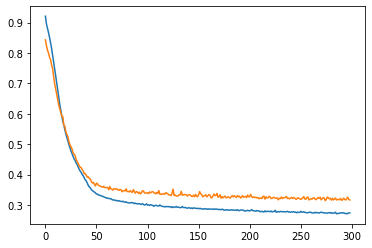

In [196]:
import keras
import tensorflow as tf
from keras import regularizers
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf


X_soap_red=X_train_soap_red
y_soap=y_train

model=Sequential()
model.add(Dense(units=15, activation='tanh', input_shape=(12,)))
model.add(Dense(units=12, activation='tanh'))
model.add(Dense(units=1))
model.summary()

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mean_squared_error'])


Hist=model.fit(X_soap_red, y_soap, epochs=300, batch_size=64, validation_split=0.2)

plt.plot(Hist.history['loss'][1:])
plt.plot(Hist.history['val_loss'][1:])



#model.predict(X_train_CM_red)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 15)                195       
                                                                 
 dense_67 (Dense)            (None, 12)                192       
                                                                 
 dense_68 (Dense)            (None, 1)                 13        
                                                                 
Total params: 400
Trainable params: 400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
94/94 [==============================] - 1s 3ms/step - loss: 1.4302 - mean_squared_error: 0.9710 - val_loss: 1.2388 - val_mean_squared_error: 0.8535
Epoch 2/300
94/94 [==============================] - 0s 1ms/step - loss: 1.2261 - mean_squared_error: 0.8997 - val_loss: 1.1038 - val_mean_squared_error: 0.83

Epoch 97/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3957 - mean_squared_error: 0.3389 - val_loss: 0.4096 - val_mean_squared_error: 0.3528
Epoch 98/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3937 - mean_squared_error: 0.3371 - val_loss: 0.4225 - val_mean_squared_error: 0.3660
Epoch 99/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3953 - mean_squared_error: 0.3388 - val_loss: 0.4213 - val_mean_squared_error: 0.3649
Epoch 100/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3922 - mean_squared_error: 0.3360 - val_loss: 0.4309 - val_mean_squared_error: 0.3748
Epoch 101/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3930 - mean_squared_error: 0.3371 - val_loss: 0.4236 - val_mean_squared_error: 0.3678
Epoch 102/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3890 - mean_squared_error: 0.3334 - val_loss: 0.4121 - val_mean_squared_error: 0.3566
Epoch 103/300
94/94 [====

94/94 [==============================] - 0s 2ms/step - loss: 0.3633 - mean_squared_error: 0.3207 - val_loss: 0.3799 - val_mean_squared_error: 0.3372
Epoch 198/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3610 - mean_squared_error: 0.3182 - val_loss: 0.3785 - val_mean_squared_error: 0.3359
Epoch 199/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3643 - mean_squared_error: 0.3218 - val_loss: 0.3884 - val_mean_squared_error: 0.3459
Epoch 200/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3626 - mean_squared_error: 0.3202 - val_loss: 0.3955 - val_mean_squared_error: 0.3531
Epoch 201/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3672 - mean_squared_error: 0.3250 - val_loss: 0.3868 - val_mean_squared_error: 0.3444
Epoch 202/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3613 - mean_squared_error: 0.3188 - val_loss: 0.3950 - val_mean_squared_error: 0.3527
Epoch 203/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.3555 - mean_squared_error: 0.3157 - val_loss: 0.3891 - val_mean_squared_error: 0.3492
Epoch 298/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3593 - mean_squared_error: 0.3195 - val_loss: 0.3762 - val_mean_squared_error: 0.3366
Epoch 299/300
94/94 [==============================] - 0s 1ms/step - loss: 0.3540 - mean_squared_error: 0.3143 - val_loss: 0.3833 - val_mean_squared_error: 0.3434
Epoch 300/300
94/94 [==============================] - 0s 1ms/step - loss: 0.3560 - mean_squared_error: 0.3162 - val_loss: 0.3781 - val_mean_squared_error: 0.3385


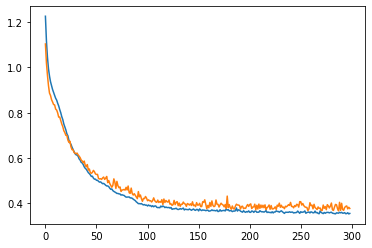

In [170]:
model_reg=Sequential()
model_reg.add(Dense(units=15, activation='tanh', input_shape=(12,), kernel_regularizer=regularizers.l2(0.0)))

model_reg.add(Dense(units=12, activation='tanh'))
model_reg.add(Dense(units=1))
model_reg.summary()

model_reg.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mean_squared_error'])
Hist_reg=model_reg.fit(X_soap_red, y_soap, epochs=300, batch_size=64, validation_split=0.2)

plt.plot(Hist_reg.history['loss'][1:])
plt.plot(Hist_reg.history['val_loss'][1:])



Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 15)                195       
                                                                 
 dense_70 (Dense)            (None, 12)                192       
                                                                 
 dense_71 (Dense)            (None, 1)                 13        
                                                                 
Total params: 400
Trainable params: 400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
94/94 [==============================] - 1s 3ms/step - loss: 1.5935 - mean_squared_error: 1.0524 - val_loss: 1.3293 - val_mean_squared_error: 0.8791
Epoch 2/300
94/94 [==============================] - 0s 1ms/step - loss: 1.2895 - mean_squared_error: 0.9148 - val_loss: 1.1438 - val_mean_squared_error: 0.83

Epoch 97/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4208 - mean_squared_error: 0.3706 - val_loss: 0.4437 - val_mean_squared_error: 0.3940
Epoch 98/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4207 - mean_squared_error: 0.3710 - val_loss: 0.4425 - val_mean_squared_error: 0.3931
Epoch 99/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4208 - mean_squared_error: 0.3713 - val_loss: 0.4497 - val_mean_squared_error: 0.4003
Epoch 100/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4214 - mean_squared_error: 0.3721 - val_loss: 0.4519 - val_mean_squared_error: 0.4026
Epoch 101/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4205 - mean_squared_error: 0.3715 - val_loss: 0.4414 - val_mean_squared_error: 0.3923
Epoch 102/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4187 - mean_squared_error: 0.3700 - val_loss: 0.4314 - val_mean_squared_error: 0.3827
Epoch 103/300
94/94 [====

94/94 [==============================] - 0s 2ms/step - loss: 0.3522 - mean_squared_error: 0.3102 - val_loss: 0.3730 - val_mean_squared_error: 0.3311
Epoch 198/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3517 - mean_squared_error: 0.3098 - val_loss: 0.3858 - val_mean_squared_error: 0.3440
Epoch 199/300
94/94 [==============================] - 0s 1ms/step - loss: 0.3489 - mean_squared_error: 0.3071 - val_loss: 0.3713 - val_mean_squared_error: 0.3293
Epoch 200/300
94/94 [==============================] - 0s 1ms/step - loss: 0.3522 - mean_squared_error: 0.3102 - val_loss: 0.3682 - val_mean_squared_error: 0.3261
Epoch 201/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3508 - mean_squared_error: 0.3089 - val_loss: 0.3656 - val_mean_squared_error: 0.3239
Epoch 202/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3492 - mean_squared_error: 0.3075 - val_loss: 0.3700 - val_mean_squared_error: 0.3280
Epoch 203/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.3423 - mean_squared_error: 0.3053 - val_loss: 0.3637 - val_mean_squared_error: 0.3267
Epoch 298/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3392 - mean_squared_error: 0.3024 - val_loss: 0.3634 - val_mean_squared_error: 0.3267
Epoch 299/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3370 - mean_squared_error: 0.3002 - val_loss: 0.3611 - val_mean_squared_error: 0.3245
Epoch 300/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3393 - mean_squared_error: 0.3026 - val_loss: 0.3625 - val_mean_squared_error: 0.3260


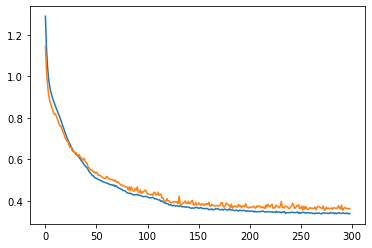

In [173]:
model_drop=Sequential()
model_drop.add(Dense(units=15, activation='tanh', input_shape=(12,), kernel_regularizer=regularizers.l2(0.045)))
model.add(Dropout(0.2))
model_drop.add(Dense(units=12, activation='tanh'))
model_drop.add(Dense(units=1))
model_drop.summary()

model_drop.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mean_squared_error'])
Hist_drop=model_drop.fit(X_soap_red, y_soap, epochs=300, batch_size=64, validation_split=0.2)

plt.plot(Hist_drop.history['loss'][1:])
plt.plot(Hist_drop.history['val_loss'][1:])

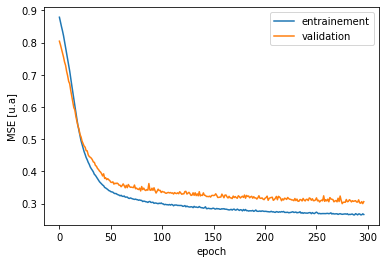

0.2998196482658386


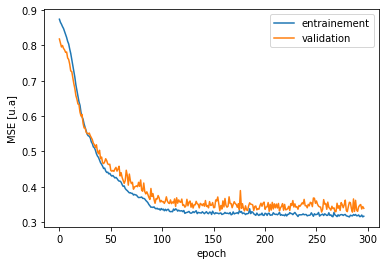

0.3277217745780945


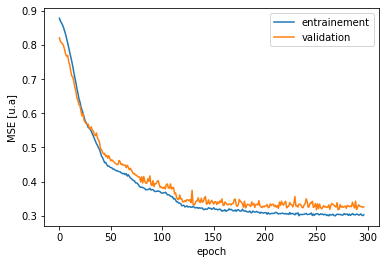

0.3171394467353821


In [179]:
plt.plot(Hist.history['mean_squared_error'][3:],label="entrainement")
plt.plot(Hist.history['val_mean_squared_error'][3:],label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("MSE [u.a]")
plt.show()
print(np.min(Hist.history['val_mean_squared_error'][3:]))

plt.plot(Hist_reg.history['mean_squared_error'][3:],label="entrainement")
plt.plot(Hist_reg.history['val_mean_squared_error'][3:],label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("MSE [u.a]")
plt.show()

print(np.min(Hist_reg.history['val_mean_squared_error'][3:]))

plt.plot(Hist_drop.history['mean_squared_error'][3:],label="entrainement")
plt.plot(Hist_drop.history['val_mean_squared_error'][3:],label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("MSE [u.a]")
plt.show()
print(np.min(Hist_drop.history['val_mean_squared_error'][3:]))


79/79 [==============================] - 0s 1ms/step
0.30963207300280876


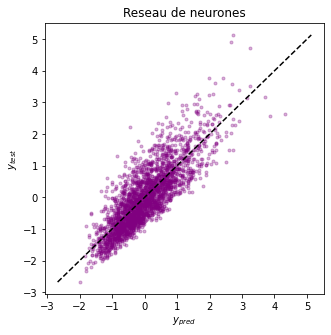

79/79 [==============================] - 0s 890us/step
0.4972052626515637


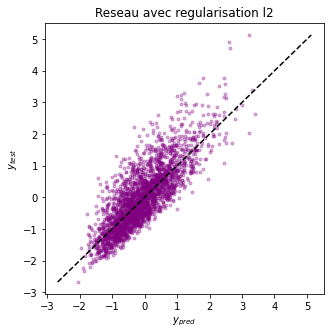

79/79 [==============================] - 0s 1ms/step
0.4912122133433323


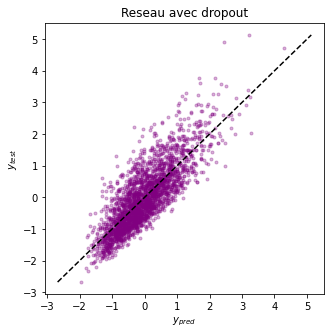

In [175]:
y_pred_test=model.predict(X_test_soap_red)
print((np.mean(np.square(y_pred_test- y_test))))
      
fig=plt.figure(figsize=(5,5))
y_pred_test_krr_PIV=krrPIV.predict(X_test_PIV)
plt.scatter(y_pred_test,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Reseau de neurones")
plt.show()

y_pred_test=model_reg.predict(X_test_soap_red)
print((np.mean(np.square(y_pred_test- y_pred))))

fig=plt.figure(figsize=(5,5))
plt.scatter(y_pred_test,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Reseau avec regularisation l2")
plt.show()

y_pred_test=model_drop.predict(X_test_soap_red)
print((np.mean(np.square(y_pred_test- y_pred))))

fig=plt.figure(figsize=(5,5))
plt.scatter(y_pred_test,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Reseau avec dropout")
plt.show()

In [200]:
y_pred_test_krr_soap=krrsoap.predict(X_test_soap_red)

y_pred_test=model.predict(X_test_soap_red)


79/79 [==============================] - 0s 884us/step


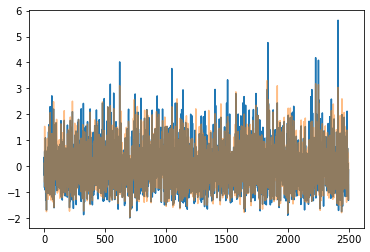

In [204]:
plt.plot(y_pred_test_krr_soap)
plt.plot(y_pred_test,alpha=0.5)

C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


E moyen : -0.011150927734375  +-  0.8818712881428635
E moyen : 1.1368683772161604e-17  +-  1.0


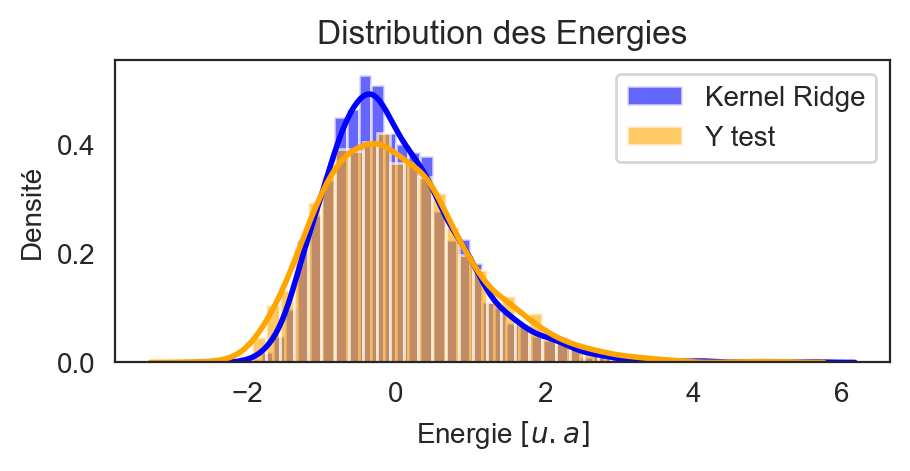

C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


E moyen : 0.0063326093  +-  0.8134304
E moyen : 1.1368683772161604e-17  +-  1.0


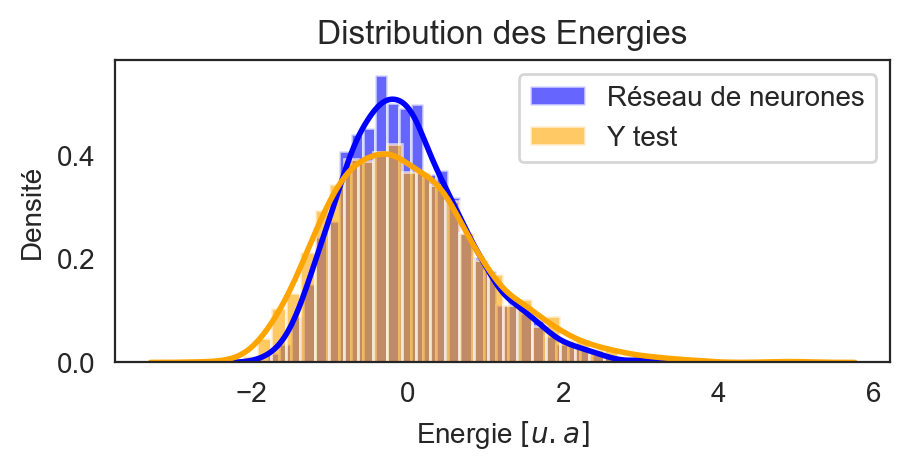

In [238]:
import seaborn as sns
sns.set_style("white")


# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(5,2), dpi= 200)
sns.distplot(pd.DataFrame(y_pred_test_krr_soap), color="blue", **kwargs,label="Kernel Ridge")
print("E moyen :",y_pred_test_krr_soap.mean()," +- ",y_pred_test_krr_soap.std())
sns.distplot(pd.DataFrame(y_test), color="orange", **kwargs,label="Y test")
print("E moyen :",y_test.mean()," +- ",y_test.std())

plt.legend()
plt.xlabel(r'Energie $[u.a]$')
plt.ylabel("Densité")

plt.title("Distribution des Energies")
plt.show()
plt.figure(figsize=(5,2), dpi= 200)

# plt.figure(figsize=(5,2), dpi= 200)
sns.distplot(pd.DataFrame(y_pred_test), color="blue", **kwargs,label="Réseau de neurones")
print("E moyen :",y_pred_test.mean()," +- ",y_pred_test.std())
sns.distplot(pd.DataFrame(y_test), color="orange", **kwargs,label="Y test")
print("E moyen :",y_test.mean()," +- ",y_test.std())

plt.legend()
plt.xlabel(r'Energie $[u.a]$')
plt.ylabel("Densité")

plt.title("Distribution des Energies")
plt.show()
